# **🎙️🔀 Speech separations ➡️  🗣️🗣️🗣️ with  variable number of 🎧🔉 sources**

## **Abstract**
   Many conversational AI tasks such as speaker diarization, ASR, and voice-command activation suffer from overlapping recordings. This is a challenging issue, yet most speech separation systems handle only a fixed number of speakers. The goal of this project is to build a data simulator for a multi-speaker dataset, experiment with different speaker counter deep learning models, and finally separate up to three concurrent speakers in single‑channel audio. We first mix up to three speakers from  [LibriSpeech‑clean](https://www.openslr.org/12) utterances with [OpenRIR](https://www.openslr.org/28/) reverberation and noise. Our experimental speaker counter-models consist of an X-Vector, ECAPA‑TDNN and OpenAI's self-supervised ASR model [Wisper](https://openai.com/index/whisper/) based feature extractor in front of your ECAPA-TDNN. We predicted the speaker count with **Whisper_ECAPA_TDNN** has **96.33%** clip‑level accuracy. Based on this estimate, we selected a pre‑trained  [speechbrain/sepformer-libri3mix](https://huggingface.co/speechbrain/sepformer-libri3mix) and [speechbrain/sepformer-wsj02mix](https://huggingface.co/speechbrain/sepformer-wsj02mix) for speech separation. We have experimented with how these models process input mixtures and produce multiple output records, each ideally containing only one speaker with standard speech separation quality metric  [SDR ( Signal-to-Distortion Ratio)](https://github.com/mir-evaluation/mir_eval) and listening test with a small group of separated signals sound.


## **Introduction**


#### **Problem and Motivation**
Smart speech assistance is the fastest-growing market in 2025. Big companies are working on Genative-AI infused Speech assistance and the competition can not be any higher than current days; companies such as Amazon have sold more than 600 million Alexa-enabled devices and user engagement grew 20% last year compared to 2023 [[1]](https://apnews.com/article/amazon-alexa-fee-ai-assistant-017c17bddfa6742d1e78873cdda3663f). These Popular voice assistance systems rely on ASR systems that detect voice activity. However, these assistants stumble when they face multiple people at once with background noise. Overlapped speech has been identified as the leading cause of diarization errors and can drive ASR word-error rates (WER) up by 30–40 % compared with single-speaker conditions. [[2]](https://www.sciencedirect.com/science/article/pii/S2772766124000697)

#### **Challenges and Prior Work**
In 2019, **CountNet**: “Estimating the Number of Concurrent Speakers using Supervised Learning” [[3]](https://ieeexplore.ieee.org/document/8506601) showed 89 % accuracy on synthetic LibriSpeech overlaps. Afterward, in 2021 Transformer-based approaches such as [[4]](https://www.sciencedirect.com/science/article/abs/pii/S0885230821001054) exploited spatial cues to push F1 beyond 0.9 on meeting data.  Finally, in 2024 ,**NTT CHiME-8** system: new multi-channel counting module showed that accurate counting improves large-scale ASR pipelines results in halve WER [[5]](https://arxiv.org/html/2409.05554v1).

For separation, Transformer architectures like **SepFormer** reached 22 dB SI-SNRi on WSJ0-2mix arXiv, yet still assume a fixed number of speakers.[[6]](https://arxiv.org/abs/2010.13154). It consist of three main module:

- Encoder:
  - Convert raw waveform x into a sequene  of feature h , where voices are easier to detect.
  - Instead of STFT, a 1-D convolution produces a latent frame every 2 ms.
- Masking Network
  - Learns which time-frequency domain belongs to speaker1 vs speaker2.
  - First chunk the sequence into 250 ms windows, intra-chunk self-attention for getting local detials.
  - Then get long-term pattern from inter-chunk self-attention.
  - PIT loss decides which mask matches which ground-truth speaker.
- Decoder
  - Reconstruct speaker1 and speaker2 as separate waveform.
  - Transposed convolution to turn masked feature into time domain.

![sepformer](https://tech.fusic.co.jp/uploads/sssep_sepformer.png)


#### **Our Approach and Contributions**

In this project, we experiment with a two-step solution:
1. A supervised speaker count estimator to predict the number of speakers:

    * Design an open-source data simulator that randomly mixes up to three **LibriSpeech-clean-100** utterances, augments them with **OpenRIR** room impulse responses and noise, and balances the 0/1/2/3-speaker classes.

    * Benchmark three embedding model
      - X-Vector
      - ECAPA-TDNN
      - Whisper-ECAPA-TDNN: Fine-tuned ECAPA-TDNN instead of MFCC frontend.

2. A specialised pre-trained Sepformer for the predicted count.


#### **Experimental Setup and Key Findings**

- The simulator produced **~16h of training mixtures** and a balanced training,validataion and test set.
- Our best **Wispere_ECAPA_TDNN**-based counter achieved **96.33% clip-level** accuracy
- Coupling this with SpeechBrain’s sepformer-wsj02mix and sepformer-libri3mix model yielded an average **97.62 dB SDR** for three speaker and **3.96 dB** excluding single speaker.
- A subjective listening test with 5 participants confirmed perceptual improvements in 86% of clips.

## **Methodology**

#### **Data Simulator**

* We have done extensive research about previous efforts to generate a multispeaker dataset. Some of the notable work:

| Dataset          | #Spk | Source speech     | Link                                                                 |
|------------------|------|-------------------|----------------------------------------------------------------------|
| Libri2Mix / Libri3Mix       | 2 /3   | LibriSpeech-clean | [Github](https://github.com/JorisCos/LibriMix) [Paper](https://arxiv.org/abs/2005.11262?utm_source)|
| MiniLibriMix      | 2  ; < 1GB  | LibriSpeech-clean | [Source](https://zenodo.org/records/4020529)|

* Mixing algorithm
* Class-balance strategy
* Target metadata JSON schema
* Flowchart of the mixing pipeline

#### **Pre-processing & Features**
* Resampling (16 kHz)
* log-mel FBANK extraction
* Mean-variance CMVN per clip
* Example mel-spectrogram

###**Speaker-Counting Models**

* x-vector.
* ECAPA-TDNN.
* Wisper-ECAPA-TDNN.
* Architecture diagram.


###**Separation Back-end**

* Pre-trained sepformer-wsj02mix
* Pre-trained sepformer-libri3mix

###**Evaluation Metrics & Protocol**

* Clip-level accuracy
* Confusion-matrix heat map
* Precision, recall,macro-F1 for counting
* SDR (Signal-to-distortion ratio)
* SIR (Signal-to-inference ratio)
* SIR (Signal-to-Artifact ratio)



## **Experimental Setup**

**NOTE** : You can download all the training results and pre-processed data from here [drive](https://drive.google.com/drive/folders/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm?usp=sharing)

#####**install Libraries**


In [5]:
!pip install torch torchaudio mir_eval

#####**Install Speechbrain**

In [28]:
%%capture
!git clone https://github.com/speechbrain/speechbrain.git
%cd speechbrain
!pip install -r requirements.txt
!pip install .
%cd ..

#####**Mount Google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#####**Download the MiniLibriMix dataset for QuickStart**

In [ ]:
# wget  (rename output and follow redirects)
!wget -c -O MiniLibriMix.zip \
     "https://zenodo.org/records/3871592/files/MiniLibriMix.zip?download=1" -P data/



--2025-04-22 14:16:50--  https://zenodo.org/records/3871592/files/MiniLibriMix.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 416 REQUESTED_RANGE_NOT_SATISFIABLE

    The file is already fully retrieved; nothing to do.



In [ ]:
!unzip MiniLibriMix.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/MiniLibriMix/train/mix_both/1025-92820-0032_8410-278217-0015.wav  
  inflating: data/MiniLibriMix/train/mix_both/1027-125140-0032_8388-275212-0023.wav  
  inflating: data/MiniLibriMix/train/mix_both/1027-125140-0051_3025-12971-0056.wav  
  inflating: data/MiniLibriMix/train/mix_both/1028-133395-0008_5115-26947-0044.wav  
  inflating: data/MiniLibriMix/train/mix_both/1031-133220-0102_6965-291718-0005.wav  
  inflating: data/MiniLibriMix/train/mix_both/1052-132776-0008_2334-150915-0045.wav  
  inflating: data/MiniLibriMix/train/mix_both/1052-139308-0031_1456-130544-0008.wav  
  inflating: data/MiniLibriMix/train/mix_both/1060-134451-0014_5293-82020-0010.wav  
  inflating: data/MiniLibriMix/train/mix_both/1061-152224-0018_112-121671-0019.wav  
  inflating: data/MiniLibriMix/train/mix_both/1066-5330-0003_192-128345-0004.wav  
  inflating: data/MiniLibriMix/train/mix_both/1079-128632-0029_323-126408-0025.wav  
  inflating:

#####**Experiment with Our Data Simulator Pipeline**

In [ ]:
#Code for downloanding the original dataset
!wget -c http://www.openslr.org/resources/12/train-clean-100.tar.gz -P data/
!tar -xvf data/train-clean-100.tar.gz -C data/

**Data Simulator Pipeline**

***Please check this code for data simulation***
[Github](https://github.com/sayemomer/Whisper_ECAPA_SPKSEP/blob/main/data_pipeline.py)

**Data Split**

***Please check the code for data split*** [Github](https://github.com/sayemomer/Whisper_ECAPA_SPKSEP/blob/main/data_split.py)

#####**Indicate data pre-processed data folder to begin experiment**

In [ ]:
#MiniLibriMix
%cd /content/drive/MyDrive/conv_project

In [2]:
#Our pre-processed dataset
%cd /content/drive/MyDrive/conv_project/CONV_AI_DATA/

/content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA


###**Check the Audio Features**

**Helper Function**


In [3]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchaudio.__version__)

2.6.0+cu124
2.6.0+cu124


In [ ]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)


def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

***Audio Metadata***

In [ ]:
SAMPLE_WAV = "/content/drive/MyDrive/conv_project/CONV_AI_DATA/splits/train/Mixture_audio/mix3_audio/mix3_100.wav"
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=80000, num_channels=1, bits_per_sample=32, encoding=PCM_F)


***MIX audio***

In [ ]:
import torchaudio, IPython.display as ipd
wave_mix, sr_mix = torchaudio.load("/content/drive/MyDrive/conv_project/CONV_AI_DATA/splits/train/Mixture_audio/mix3_audio/mix3_100.wav")
ipd.Audio(wave_mix.numpy(), rate=sr_mix)


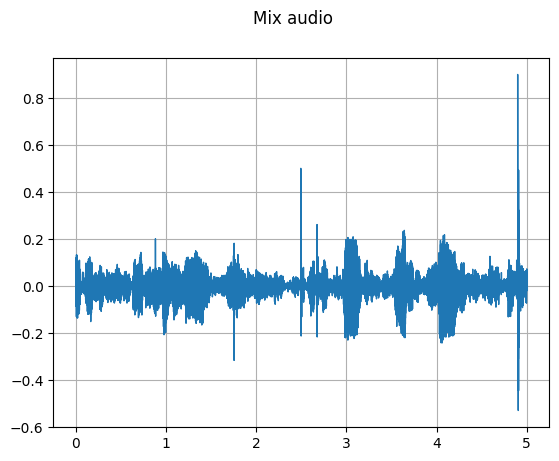

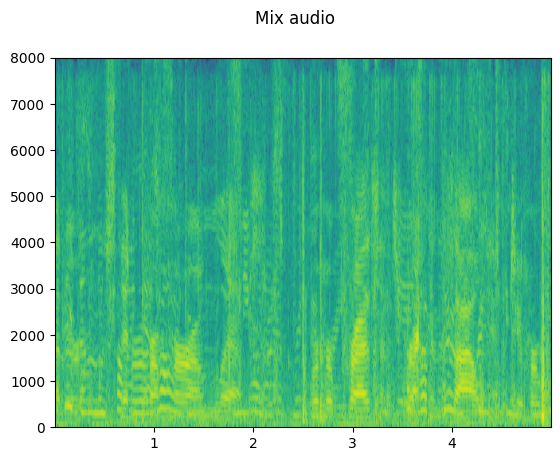

In [ ]:
plot_waveform(wave_mix, sr_mix, title="Mix audio")
plot_specgram(wave_mix, sr_mix, title="Mix audio")

***Clean Audio***

In [ ]:
import torchaudio, IPython.display as ipd
wave_cln, sr_cln = torchaudio.load("/content/drive/MyDrive/conv_project/CONV_AI_DATA/splits/train/Mixture_audio_clean/Mix3_clean/mix3_100.wav")
ipd.Audio(wave_cln.numpy(), rate=sr_cln)

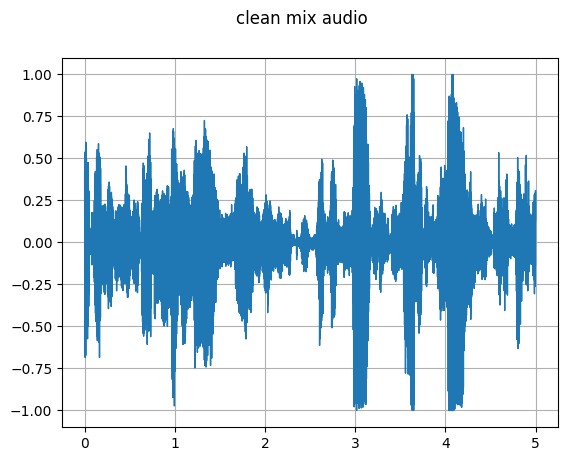

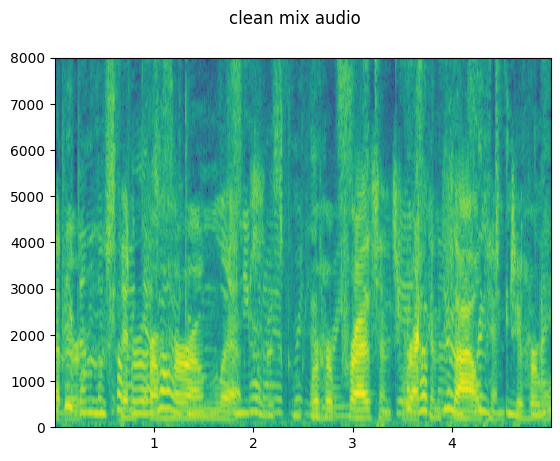

In [ ]:
plot_waveform(wave_cln, sr_cln, title="clean mix audio")
plot_specgram(wave_cln, sr_cln, title="clean mix audio")

***Noise***


In [ ]:
import torchaudio, IPython.display as ipd
wave_n, sr_n = torchaudio.load("/content/drive/MyDrive/conv_project/CONV_AI_DATA/splits/train/Sources/noise_rir/mix3_100_noiserir.wav")
ipd.Audio(wave_n.numpy(), rate=sr_n)

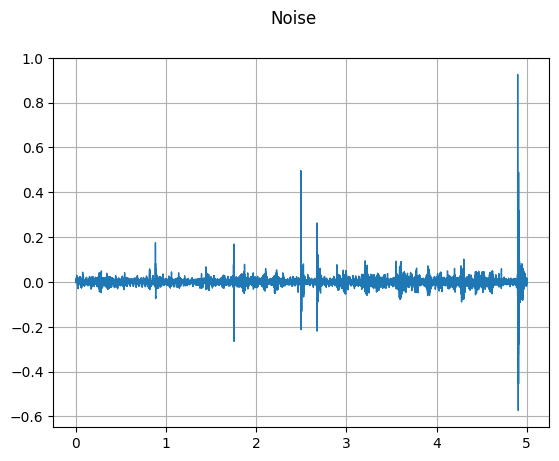

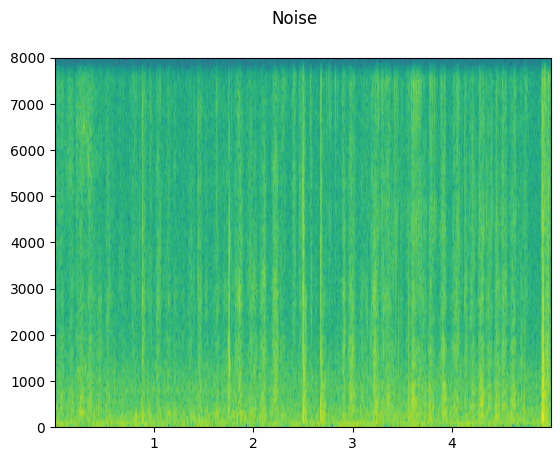

In [ ]:
plot_waveform(wave_n, sr_n, title="Noise")
plot_specgram(wave_n, sr_n, title="Noise")

***Speaker 1***


In [ ]:
import torchaudio, IPython.display as ipd
wave, sr = torchaudio.load("/content/drive/MyDrive/conv_project/CONV_AI_DATA/splits/train/Sources/spk1/mix3_100_spk1.wav")
ipd.Audio(wave.numpy(), rate=sr)

***Speaker 2***

In [ ]:
import torchaudio, IPython.display as ipd
wave, sr = torchaudio.load("/content/drive/MyDrive/conv_project/CONV_AI_DATA/splits/train/Sources/spk2/mix3_100_spk2.wav")
ipd.Audio(wave.numpy(), rate=sr)

***Speaker 3***

In [ ]:
import torchaudio, IPython.display as ipd
wave, sr = torchaudio.load("/content/drive/MyDrive/conv_project/CONV_AI_DATA/splits/train/Sources/spk3/mix3_100_spk3.wav")
ipd.Audio(wave.numpy(), rate=sr)

###**Data Preparation**

If we inspect the data stored in /content/data/splits, you will see 3 folders and subfolders in each:
- train
  - Mixture-audio
    - mix1_audio
    - mix2_audio
    - mix3_audio
  - Mixture_audio_clean
    - mix1_clean
    - mix2_clean
    - mix3_clean
  - Sources
    - noise_rir
    - spk1
    - spk2
    - spk3
- test
  - Same as train
- valid
  - same as train

Each Mixture-audio folder contains mixed audios in three subcategory(1,2,3 speakers). Mixture_audio_clean contains clean audio(without noise) for each category. Finally, the Source folder is the gold levels for each mixture audio. Each signal is sampled at 16 kHz.

Run the code below to prepare the JSON data-manifest files. You have to split the dataset into train, validation, and test sets.

We have to create 3 JSON files:

    'train.json'
    'valid.json'
    'test.json'

They should be formatted in the following way:

train.json
```
{
  "mix1_audio_mix1_783": {
    "path": "splits/train/Mixture_audio/mix1_audio/mix1_783.wav",
    "length": 5.0,
    "n_src": 1
  },
  "mix1_audio_mix1_712": {
    "path": "splits/train/Mixture_audio/mix1_audio/mix1_712.wav",
    "length": 5.0,
    "n_src": 1
  },
  "mix1_audio_mix1_146": {
    "path": "splits/train/Mixture_audio/mix1_audio/mix1_146.wav",
    "length": 5.0,
    "n_src": 1
  },
....
```
valid.json
```
{
  "Mix1_clean_mix1_937": {
    "path": "splits/valid/Mixture_audio_clean/Mix1_clean/mix1_937.wav",
    "length": 5.0,
    "n_src": 1
  },
  "Mix1_clean_mix1_936": {
    "path": "splits/valid/Mixture_audio_clean/Mix1_clean/mix1_936.wav",
    "length": 5.0,
    "n_src": 1
  },
  "Mix1_clean_mix1_941": {
    "path": "splits/valid/Mixture_audio_clean/Mix1_clean/mix1_941.wav",
    "length": 5.0,
    "n_src": 1
  },
....
```

test.json
```
{
  "Mix1_clean_mix1_898": {
    "path": "splits/test/Mixture_audio_clean/Mix1_clean/mix1_898.wav",
    "length": 5.0,
    "n_src": 1
  },
  "Mix1_clean_mix1_248": {
    "path": "splits/test/Mixture_audio_clean/Mix1_clean/mix1_248.wav",
    "length": 5.0,
    "n_src": 1
  },
  "Mix1_clean_mix1_521": {
    "path": "splits/test/Mixture_audio_clean/Mix1_clean/mix1_521.wav",
    "length": 5.0,
    "n_src": 1
  },
  ...

  ```

If everything is fine, you should have 12050 files for training, 1500 for validation, and 1529 for testing.

**note**:

    - MiniLibriSpeech doesnot have any testing split , thus we have another data preparation file for that.

**Data Menifest file for MiniLibriSpeeech**

In [ ]:
import json
import os
import torchaudio
from speechbrain.utils.data_utils import get_all_files
from speechbrain.dataio.dataio import read_audio
import random


root = "data/MiniLibriMix"
all_wavs = get_all_files(root, match_and=[".wav"])

splits = {"train": [], "val": [], "test": []}
for wav in all_wavs:

    parts = os.path.relpath(wav, root).split(os.sep)
    split = parts[0]
    if split in splits:
        splits[split].append(wav)



all_train = splits["train"]


test_frac = 0.10
n_test    = int(len(all_train) * test_frac)


test_files = random.sample(all_train, n_test)
train_files = [f for f in all_train if f not in test_files]


splits["train"] = train_files
splits["test"]  = test_files


print(f"Found {len(all_wavs)} files in {len(splits)} splits")

for split, file_list in splits.items():
    print(f"{split}: {len(file_list)} files")

def create_json(json_file, file_list):
    json_dict = {}
    for wav_path in file_list:

        info     = torchaudio.info(wav_path)

        duration = info.num_frames / info.sample_rate


        rel_path = os.path.relpath(wav_path, root).replace(os.sep, "/")


        category = rel_path.split("/")[1]


        if category.startswith("mix"):
            n_src = 2
        elif category.startswith("s1"):
            n_src = 1
        elif category.startswith("s2"):
            n_src = 1
        elif category.startswith("noise"):
            n_src = 0
        else:
            raise ValueError(f"Unknown category {category}")



        uttid = f"{category}_{os.path.splitext(os.path.basename(wav_path))[0]}"

        if category == "s1":
            spk = "speaker1"
        elif category == "s2":
            spk = "speaker2"
        elif category == "mix_both":
            spk = "mix"
        else:
            spk = "noise"


        json_dict[uttid] = {
            "path":    wav_path,
            "length":  duration,
            "n_src":   n_src,
            "spk":     spk
        }


    with open(json_file, "w", encoding="utf-8") as f:
        json.dump(json_dict, f, indent=2)

create_json("train.json", splits["train"])
create_json("valid.json", splits["val"])
create_json("test.json",  splits["test"])



DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


Found 5000 files in 3 splits
train: 3600 files
val: 1000 files
test: 400 files


**Data Menifest file for our data**

In [ ]:
import json
import os
import torchaudio
from speechbrain.utils.data_utils import get_all_files
from speechbrain.dataio.dataio import read_audio
import random
from tqdm import tqdm


root = "splits"
all_wavs = get_all_files(root, match_and=[".wav"])


splits = {"train": [], "valid": [], "test": []}
for wav in all_wavs:

    parts = os.path.relpath(wav, root).split(os.sep)
    split = parts[0]
    if split in splits:
        splits[split].append(wav)


print(f"Found {len(all_wavs)} files in {len(splits)} splits")

for split, file_list in splits.items():
    print(f"{split}: {len(file_list)} files")

def create_json(json_file, file_list):
    json_dict = {}
    for wav_path in tqdm(file_list, desc="Processing files"):

        info = torchaudio.info(wav_path)

        duration = info.num_frames / info.sample_rate

        rel_path = os.path.relpath(wav_path, root).replace(os.sep, "/")

        category = rel_path.split("/")[2]

        if category.startswith("mix1_audio"):
            n_src = 1
        elif category.startswith("mix2_audio"):
            n_src = 2
        elif category.startswith("mix3_audio"):
            n_src = 3
        elif category.startswith("Mix1_clean"):
            n_src = 1
        elif category.startswith("Mix2_clean"):
            n_src = 2
        elif category.startswith("Mix3_clean"):
            n_src = 3
        elif category.startswith("spk1"):
            n_src = 1
        elif category.startswith("spk2"):
            n_src = 1
        elif category.startswith("spk3"):
            n_src = 1
        elif category.startswith("noise_rir"):
            n_src = 0
        else:
            raise ValueError(f"Unknown category {category}")

        # print(rel_path.split("/")[3].split(".")[0])
        # print(category)

        uttid = f"{category}_{rel_path.split('/')[3].split('.')[0]}"
        # print(uttid)

        # 4. Add to dict
        json_dict[uttid] = {
            "path":    wav_path,
            "length":  duration,
            "n_src":   n_src
        }

        # print(json_dict)

    # 5. Write out once per split
    with open(json_file, "w", encoding="utf-8") as f:
        json.dump(json_dict, f, indent=2)

# 6. Generate train/valid/test JSONs
create_json("train.json", splits["train"])
create_json("valid.json", splits["valid"])
create_json("test.json",  splits["test"])

Found 15079 files in 3 splits
train: 12050 files
valid: 1500 files
test: 1529 files


Processing files: 100%|██████████| 1529/1529 [00:08<00:00, 178.89it/s]


###**Speaker count with MFCCs and Xvectors**

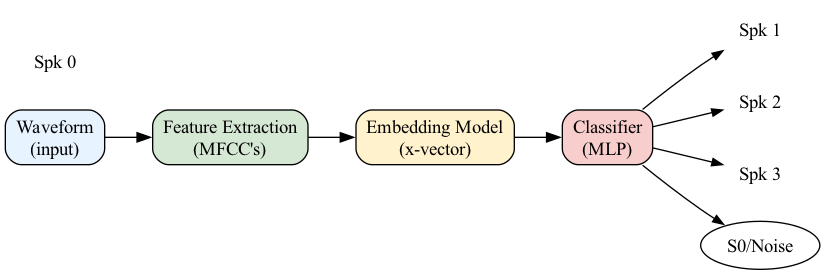

**Hyper parameters**

In [10]:
%%file hparams_xvector_mfccs.yaml

# Your code here

# #################################
# Basic training parameters for digit classification with Xvector
#
# Author:
#  * Mirco Ravanelli 2021
# #################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/MFCCs/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Path where data manifest files are stored
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Feature parameters
n_mels: 20
n_mfcc: 20

# Training Parameters
sample_rate: 16000
number_of_epochs: 10
batch_size: 64
lr_start: 0.001
lr_final: 0.0001
n_classes: 4
emb_dim: 128
dataloader_options:
    batch_size: !ref <batch_size>
    num_workers: 8

loss: !new:torch.nn.CrossEntropyLoss
  reduction: none

dropout_layer: !new:torch.nn.Dropout
    p: 0.3

# Feature extraction
compute_features: !new:speechbrain.lobes.features.MFCC
    n_mels: !ref <n_mels>
    n_mfcc: !ref <n_mfcc>
    context: False
    deltas: False
    n_fft:  400
    filter_shape: 'triangular'
    param_change_factor:  1.0
    param_rand_factor:  0.0
    left_frames:  5
    right_frames: 5
    win_length: 25
    hop_length: 10


# Mean and std normalization of the input features
mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

# Embedding model: from variable size digits gets a fixed size embedding vector
embedding_model: !new:speechbrain.lobes.models.Xvector.Xvector
    in_channels: !ref <n_mels>
    activation: !name:torch.nn.LeakyReLU
    tdnn_blocks: 5
    tdnn_channels: [64, 64, 64, 64, 128]
    tdnn_kernel_sizes: [5, 3, 3, 1, 1]
    tdnn_dilations: [1, 2, 3, 1, 1]
    lin_neurons: !ref <emb_dim>

# Clasifier applied on top of the embeddings
classifier: !new:speechbrain.lobes.models.Xvector.Classifier
    input_shape: [null, null, !ref <emb_dim>]
    activation: !name:torch.nn.LeakyReLU
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: !ref <n_classes>


# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>
    dropout_layer: !ref <dropout_layer>

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.
opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>

# This function manages learning rate annealing over the epochs.
# We here use the simple lr annealing method that linearly decreases
# the lr from the initial value to the final one.
lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>


Overwriting hparams_xvector_mfccs.yaml


**Training script**

In [34]:
%%file train.py

import torchaudio.functional as F

#!/usr/bin/env python3

import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml


# Brain class for speech enhancement training
class XVector_Brain(sb.Brain):
    """Class that manages the training loop. See speechbrain.core.Brain."""

    def compute_forward(self, batch, stage):
        """Runs all the computations that transforms the input into the
        output probabilities over the N classes.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """
        batch = batch.to(self.device)


        # Compute features, embeddings, and predictions
        wavs, lens = batch.sig

        # Feature extraction and normalization
        feats = self.modules.compute_features(wavs)
        feats = self.modules.mean_var_norm(feats, lens)

        embeddings = self.modules.embedding_model(feats, lens)
        outputs = self.modules.classifier(embeddings)

        # Squeeze out any singleton “time” dimension:
        if outputs.dim() == 3 and outputs.size(1) == 1:
            outputs = outputs.squeeze(1)   # now [B, C]

        return outputs


    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        predictions : tensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        _, lens = batch.sig

        labels = batch.n_src

        # Compute the cost function
        loss   = self.hparams.loss(predictions, labels)

        self.loss_metric.append(batch.id, predictions, labels)

        # Compute classification error at test time
        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, labels)

        return loss.mean()

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Set up statistics trackers for this stage

        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=self.hparams.loss
        )
        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss

        # Summarize the statistics from the stage for record-keeping.
        else:
          stats = {"loss": stage_loss, "error": self.error_metrics.summarize("average")}

        # At the end of validation...
        if stage == sb.Stage.VALID:

            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            # Save the current checkpoint and delete previous checkpoints,
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        # # We also write statistics about test data to stdout and to the logfile.
        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )


def dataio_prep(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions.
    We expect `prepare_mini_librispeech` to have been called before this,
    so that the `train.json`, `valid.json`,  and `valid.json` manifest files
    are available.
    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.
    Returns
    -------
    datasets : dict
        Contains two keys, "train" and "valid" that correspond
        to the appropriate DynamicItemDataset object.
    """

    # Initialization of the label encoder. The label encoder assigns to each
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    # Define audio pipeline
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""

        # sig, fs = torchaudio.load(wav)
        # sig = sb.dataio.dataio.read_audio(wav)
        # sig =  sig.squeeze()
        sig = sb.dataio.dataio.read_audio(wav)
        return sig


    # Define label pipeline:
    @sb.utils.data_pipeline.takes("n_src")
    @sb.utils.data_pipeline.provides("n_src")
    def label_pipeline(digit):
        """Defines the pipeline to process the digit labels.
        Note that we have to assign a different integer to each class
        through the label encoder.
        """
        yield digit

    # Define datasets. We also connect the dataset with the data processing
    # functions defined above.
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    hparams["dataloader_options"]["shuffle"] = True
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "n_src"],
        )

    # Load or compute the label encoder (with multi-GPU DDP support)
    # Please, take a look into the lab_enc_file to see the label to index
    # mapping.
    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="n_src"
    )

    return datasets


# Recipe begins!
if __name__ == "__main__":

    # Reading command line arguments.
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Load hyperparameters file with command-line overrides.
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Create dataset objects "train", "valid", and "test".
    datasets = dataio_prep(hparams)

    # Initialize the Brain object to prepare for mask training.
    xvector_brain = XVector_Brain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    xvector_brain.fit(
        epoch_counter=xvector_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    # Load the best checkpoint for evaluation
    xvector_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )


Overwriting train.py


**Run the code below to train model**

In [ ]:
# Delete the output folder to start training from scratch
# (and not from a previous checkpoint).
!rm -rf ./results/MFCCs/1986/*

# Run Training
!python train.py hparams_xvector_mfccs.yaml

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/MFCCs/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`
speechbrain.core - XV

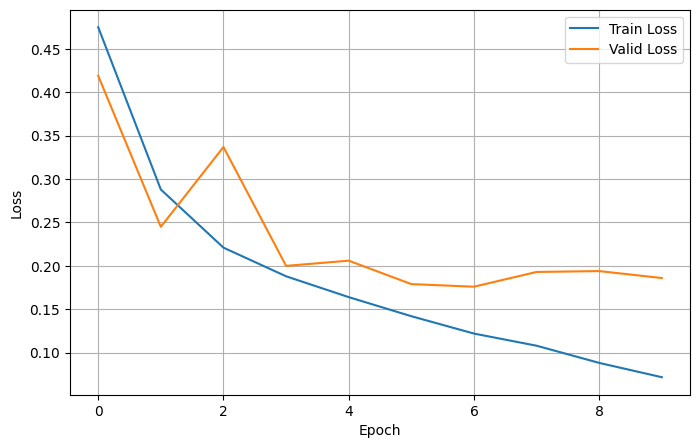

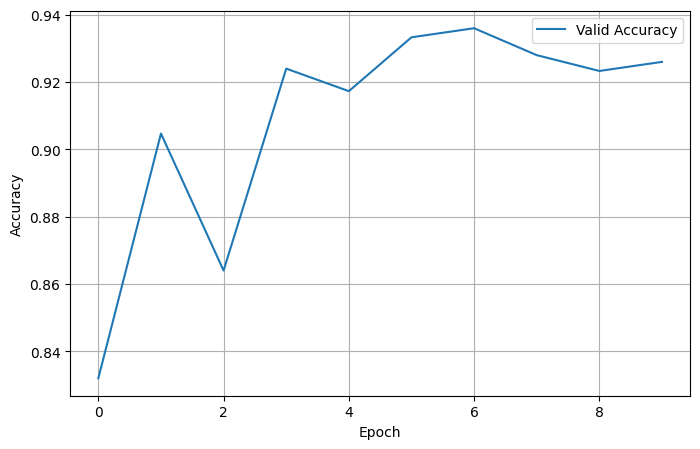

Final Validation Accuracy: 92.60%
Test Accuracy: 91.76%


In [ ]:
import re
import matplotlib.pyplot as plt

def get_metrics(log_file):
    """
    Extracts train losses, valid losses, valid errors, and final test error from the given log file.
    Returns:
        train_losses (list of float)
        valid_losses (list of float)
        valid_errors (list of float)
        test_error (float or None)
    """
    train_losses = []
    valid_losses = []
    valid_errors = []
    test_error = None


    epoch_pattern = re.compile(
        r"train loss:\s*([\d.eE+-]+).*valid loss:\s*([\d.eE+-]+),\s*valid error:\s*([\d.eE+-]+)"
    )

    test_pattern = re.compile(r"test error:\s*([\d.eE+-]+)")

    with open(log_file, 'r') as f:
        for line in f:
            m = epoch_pattern.search(line)
            if m:
                train_losses.append(float(m.group(1)))
                valid_losses.append(float(m.group(2)))
                valid_errors.append(float(m.group(3)))
            t = test_pattern.search(line)
            if t:
                test_error = float(t.group(1))

    return train_losses, valid_losses, valid_errors, test_error

log_file = '/content/drive/MyDrive/conv_project/CONV_AI_DATA/results/MFCCs/1986/train_log.txt'
train_losses, valid_losses, valid_errors, test_error = get_metrics(log_file)


plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


valid_accuracies = [1.0 - err for err in valid_errors]
plt.figure(figsize=(8, 5))
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


if valid_accuracies:
    print(f"Final Validation Accuracy: {valid_accuracies[-1]*100:.2f}%")
else:
    print("No validation error entries found in log.")

if test_error is not None:
    test_accuracy = 1.0 - test_error
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
else:
    print("No test error entry found in log.")


###**Speaker count with ECAPA-TDNN**


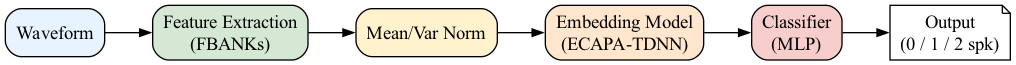

**Hyper Parameters**

In [ ]:
%%file hparams_ecapa.yaml

# Seed for reproducibility
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

# Path configurations
output_folder: !ref results/ECAPA-TDNN/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Training parameters
n_mels: 80
sample_rate: 16000
number_of_epochs: 20
batch_size: 64
n_languages: 4  # 0, 1, 2,3 speakers
emb_dim: 192  # Embedding dimension
emb_attention_channels: 128

# Dataset manifests
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

dataloader_options:
    batch_size: !ref <batch_size>
    num_workers: 8
    drop_last: True
    shuffle: True

compute_features: !new:speechbrain.lobes.features.Fbank
        n_mels: !ref <n_mels>

embedding_model: !new:speechbrain.lobes.models.ECAPA_TDNN.ECAPA_TDNN
        input_size: !ref <n_mels>
        activation: !name:torch.nn.LeakyReLU
        channels: [512, 512, 512, 512, 1536]
        kernel_sizes: [5, 3, 3, 3, 1]
        dilations: [1, 2, 3, 4, 1]
        attention_channels: !ref <emb_attention_channels>
        lin_neurons: !ref <emb_dim>

classifier: !new:speechbrain.lobes.models.ECAPA_TDNN.Classifier
      input_size: !ref <emb_dim>
      out_neurons: !ref <n_languages>
      lin_blocks: 1
      lin_neurons: !ref <emb_dim>

# Mean and std normalization of the input features
mean_var_norm_input: !new:speechbrain.processing.features.InputNormalization
    norm_type: global


# Model architecture
modules:
    compute_features: !ref <compute_features>
    embedding_model: !ref <embedding_model>
    mean_var_norm: !ref <mean_var_norm_input>
    classifier: !ref <classifier>

# Loss function
loss: !new:torch.nn.CrossEntropyLoss
  reduction: none


# Learning rates
lr: 0.001
lr_final: 0.0001

# Optimizer configuration
opt_class: !name:torch.optim.Adam
    lr: !ref <lr>
    weight_decay: 0.000002

# Learning rate scheduling
lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>


# Checkpointing and logging
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        normalizer_input: !ref <mean_var_norm_input>
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        counter: !ref <epoch_counter>


# Epoch counter
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

Overwriting hparams_ecapa.yaml


In [ ]:
%%file train_TDNN.py

import torchaudio.functional as F

#!/usr/bin/env python3

import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml


# Brain class for speech enhancement training
class ECAPA_Brain(sb.Brain):
    """Class that manages the training loop. See speechbrain.core.Brain."""

    def compute_forward(self, batch, stage):
        """Runs all the computations that transforms the input into the
        output probabilities over the N classes.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """
        batch = batch.to(self.device)


        # Compute features, embeddings, and predictions
        wavs, lens = batch.sig

        # Feature extraction and normalization
        feats = self.modules.compute_features(wavs)
        feats = self.modules.mean_var_norm(feats, lens)

        embeddings = self.modules.embedding_model(feats, lens)
        outputs = self.modules.classifier(embeddings)


        if outputs.dim() == 3 and outputs.size(1) == 1:
            outputs = outputs.squeeze(1)

        return outputs


    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        predictions : tensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        _, lens = batch.sig

        labels = batch.n_src

        # Compute the cost function
        loss   = self.hparams.loss(predictions, labels)

        self.loss_metric.append(batch.id, predictions, labels)

        # Compute classification error at test time
        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, labels)

        return loss.mean()

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Set up statistics trackers for this stage

        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=self.hparams.loss
        )
        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss

        # Summarize the statistics from the stage for record-keeping.
        else:
          stats = {"loss": stage_loss, "error": self.error_metrics.summarize("average")}

        # At the end of validation...
        if stage == sb.Stage.VALID:

            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            # Save the current checkpoint and delete previous checkpoints,
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        # # We also write statistics about test data to stdout and to the logfile.
        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )


def dataio_prep(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions.
    We expect `prepare_mini_librispeech` to have been called before this,
    so that the `train.json`, `valid.json`,  and `valid.json` manifest files
    are available.
    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.
    Returns
    -------
    datasets : dict
        Contains two keys, "train" and "valid" that correspond
        to the appropriate DynamicItemDataset object.
    """

    # Initialization of the label encoder. The label encoder assigns to each
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    # Define audio pipeline
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""

        # sig, fs = torchaudio.load(wav)
        # sig = sb.dataio.dataio.read_audio(wav)
        # sig =  sig.squeeze()
        sig = sb.dataio.dataio.read_audio(wav)
        return sig


    # Define label pipeline:
    @sb.utils.data_pipeline.takes("n_src")
    @sb.utils.data_pipeline.provides("n_src")
    def label_pipeline(digit):
        """Defines the pipeline to process the digit labels.
        Note that we have to assign a different integer to each class
        through the label encoder.
        """
        yield digit

    # Define datasets. We also connect the dataset with the data processing
    # functions defined above.
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    hparams["dataloader_options"]["shuffle"] = True
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "n_src"],
        )

    # Load or compute the label encoder (with multi-GPU DDP support)
    # Please, take a look into the lab_enc_file to see the label to index
    # mapping.
    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="n_src"
    )

    return datasets


# Recipe begins!
if __name__ == "__main__":

    # Reading command line arguments.
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Load hyperparameters file with command-line overrides.
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Create dataset objects "train", "valid", and "test".
    datasets = dataio_prep(hparams)

    # Initialize the Brain object to prepare for mask training.
    ecapa_brain = ECAPA_Brain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    ecapa_brain.fit(
        epoch_counter=ecapa_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    # Load the best checkpoint for evaluation
    ecapa_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )


Overwriting train_TDNN.py


In [ ]:
!rm -rf ./results/ECAPA-TDNN/1986/*

!python train_TDNN.py hparams_ecapa.yaml

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/ECAPA-TDNN/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`
speechbrain.core -

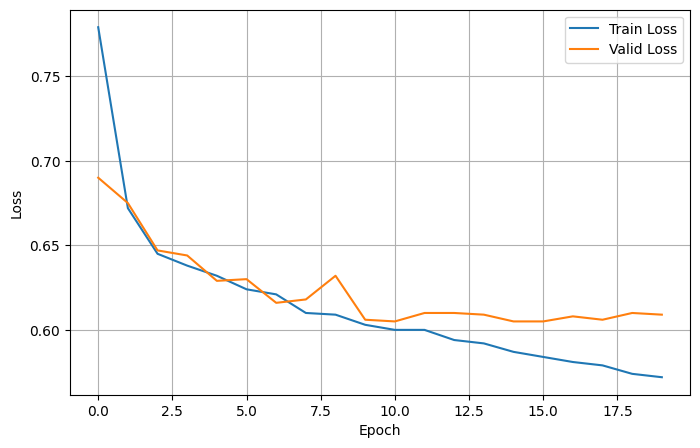

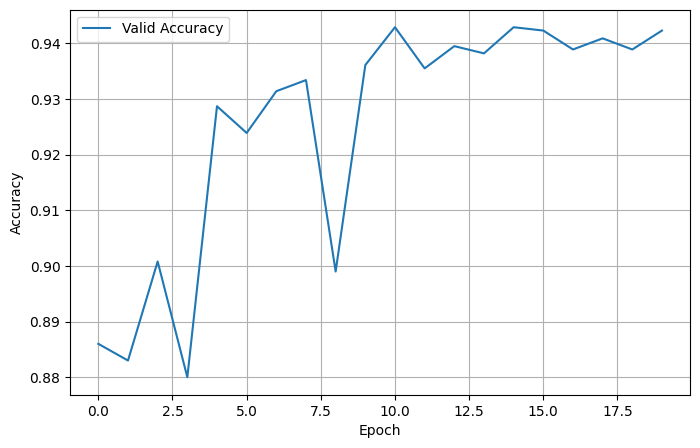

Final Validation Accuracy: 94.23%
Test Accuracy: 93.41%


In [ ]:
import re
import matplotlib.pyplot as plt

def get_metrics(log_file):
    """
    Extracts train losses, valid losses, valid errors, and final test error from the given log file.
    Returns:
        train_losses (list of float)
        valid_losses (list of float)
        valid_errors (list of float)
        test_error (float or None)
    """
    train_losses = []
    valid_losses = []
    valid_errors = []
    test_error = None


    epoch_pattern = re.compile(
        r"train loss:\s*([\d.eE+-]+).*valid loss:\s*([\d.eE+-]+),\s*valid error:\s*([\d.eE+-]+)"
    )

    test_pattern = re.compile(r"test error:\s*([\d.eE+-]+)")

    with open(log_file, 'r') as f:
        for line in f:
            m = epoch_pattern.search(line)
            if m:
                train_losses.append(float(m.group(1)))
                valid_losses.append(float(m.group(2)))
                valid_errors.append(float(m.group(3)))
            t = test_pattern.search(line)
            if t:
                test_error = float(t.group(1))

    return train_losses, valid_losses, valid_errors, test_error

log_file = '/content/drive/MyDrive/conv_project/CONV_AI_DATA/results/ECAPA-TDNN/1986/train_log.txt'
train_losses, valid_losses, valid_errors, test_error = get_metrics(log_file)


plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


valid_accuracies = [1.0 - err for err in valid_errors]
plt.figure(figsize=(8, 5))
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


if valid_accuracies:
    print(f"Final Validation Accuracy: {valid_accuracies[-1]*100:.2f}%")
else:
    print("No validation error entries found in log.")

if test_error is not None:
    test_accuracy = 1.0 - test_error
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
else:
    print("No test error entry found in log.")


###**Speaker count with Whisper-ECAPA-TDNN**


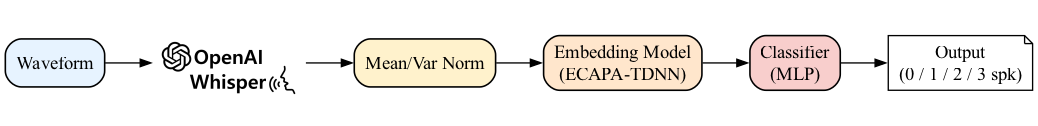

In [27]:
%%file hparams__Whisper_ecapa.yaml

# Seed for reproducibility
seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

# Path configurations
output_folder: !ref results/Whisper_ECAPA-TDNN/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Training parameters
n_mels: 80
sample_rate: 16000
number_of_epochs: 20
batch_size: 64
n_languages: 4  # 0, 1, 2,3 speakers
emb_dim: 384  # Embedding dimension
emb_attention_channels: 128

# Dataset manifests
train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

dataloader_options:
    batch_size: !ref <batch_size>
    num_workers: 8
    drop_last: True
    shuffle: True

compute_features: !new:speechbrain.lobes.models.huggingface_transformers.whisper.Whisper
        source: 'openai/whisper-tiny'
        save_path: !ref <output_folder>/whisper
        sampling_rate: !ref <sample_rate>
        encoder_only: true
        freeze: true



embedding_model: !new:speechbrain.lobes.models.ECAPA_TDNN.ECAPA_TDNN
        input_size:  !ref <emb_dim>
        activation: !name:torch.nn.LeakyReLU
        channels: [256,256,256,256,768]
        kernel_sizes: [5, 3, 3, 3, 1]
        dilations: [1, 2, 3, 4, 1]
        attention_channels: !ref <emb_attention_channels>
        lin_neurons: !ref <emb_dim>

classifier: !new:speechbrain.lobes.models.ECAPA_TDNN.Classifier
      input_size: !ref <emb_dim>
      out_neurons: !ref <n_languages>
      lin_blocks: 1
      lin_neurons: !ref <emb_dim>

# Mean and std normalization of the input features
mean_var_norm_input: !new:speechbrain.processing.features.InputNormalization
    norm_type: global


# Model architecture
modules:
    compute_features: !ref <compute_features>
    embedding_model: !ref <embedding_model>
    mean_var_norm: !ref <mean_var_norm_input>
    classifier: !ref <classifier>

# Loss function
loss: !new:torch.nn.CrossEntropyLoss
  reduction: none


# Learning rates
lr: 0.001
lr_final: 0.0001

# Optimizer configuration
opt_class: !name:torch.optim.Adam
    lr: !ref <lr>
    weight_decay: 0.000002

# Learning rate scheduling
lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>


# Checkpointing and logging
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        normalizer_input: !ref <mean_var_norm_input>
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        counter: !ref <epoch_counter>


# Epoch counter
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

frozen_modules:
  - compute_features

Overwriting hparams__Whisper_ecapa.yaml


In [26]:
%%file train_Whisper_TDNN.py

import torchaudio.functional as F

#!/usr/bin/env python3

import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml


# Brain class for speech enhancement training
class Whisper_ECAPA_Brain(sb.Brain):
    """Class that manages the training loop. See speechbrain.core.Brain."""

    def compute_forward(self, batch, stage):
        """Runs all the computations that transforms the input into the
        output probabilities over the N classes.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """
        batch = batch.to(self.device)


        # Compute features, embeddings, and predictions
        wavs, lens = batch.sig

        # Feature extraction and normalization
        feats = self.modules.compute_features(wavs)
        feats = self.modules.mean_var_norm(feats,lens)

        embeddings = self.modules.embedding_model(feats)
        outputs = self.modules.classifier(embeddings)


        if outputs.dim() == 3 and outputs.size(1) == 1:
            outputs = outputs.squeeze(1)

        return outputs


    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        predictions : tensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        _, lens = batch.sig

        labels = batch.n_src

        # Compute the cost function
        loss   = self.hparams.loss(predictions, labels)

        self.loss_metric.append(batch.id, predictions, labels)

        # Compute classification error at test time
        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, labels)

        return loss.mean()

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Set up statistics trackers for this stage

        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=self.hparams.loss
        )
        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss

        # Summarize the statistics from the stage for record-keeping.
        else:
          stats = {"loss": stage_loss, "error": self.error_metrics.summarize("average")}

        # At the end of validation...
        if stage == sb.Stage.VALID:

            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            # Save the current checkpoint and delete previous checkpoints,
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        # # We also write statistics about test data to stdout and to the logfile.
        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )


def dataio_prep(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions.
    We expect `prepare_mini_librispeech` to have been called before this,
    so that the `train.json`, `valid.json`,  and `valid.json` manifest files
    are available.
    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.
    Returns
    -------
    datasets : dict
        Contains two keys, "train" and "valid" that correspond
        to the appropriate DynamicItemDataset object.
    """

    # Initialization of the label encoder. The label encoder assigns to each
    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    # Define audio pipeline
    @sb.utils.data_pipeline.takes("path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""

        # sig, fs = torchaudio.load(wav)
        # sig = sb.dataio.dataio.read_audio(wav)
        # sig =  sig.squeeze()
        sig = sb.dataio.dataio.read_audio(wav)
        return sig


    # Define label pipeline:
    @sb.utils.data_pipeline.takes("n_src")
    @sb.utils.data_pipeline.provides("n_src")
    def label_pipeline(digit):
        """Defines the pipeline to process the digit labels.
        Note that we have to assign a different integer to each class
        through the label encoder.
        """
        yield digit

    # Define datasets. We also connect the dataset with the data processing
    # functions defined above.
    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    hparams["dataloader_options"]["shuffle"] = True
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "n_src"],
        )

    # Load or compute the label encoder (with multi-GPU DDP support)
    # Please, take a look into the lab_enc_file to see the label to index
    # mapping.
    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="n_src"
    )

    return datasets


# Recipe begins!
if __name__ == "__main__":

    # Reading command line arguments.
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Load hyperparameters file with command-line overrides.
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin,  overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Create dataset objects "train", "valid", and "test".
    datasets = dataio_prep(hparams)

    # Initialize the Brain object to prepare for mask training.
    whisper_ecapa_brain = Whisper_ECAPA_Brain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    whisper_ecapa_brain.fit(
        epoch_counter=whisper_ecapa_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )

    # Load the best checkpoint for evaluation
    whisper_ecapa_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )

Overwriting train_Whisper_TDNN.py


In [19]:
!rm -rf ./results/Whisper_ECAPA-TDNN/1986/*

!python train_Whisper_TDNN.py hparams__Whisper_ecapa.yaml

2025-04-25 14:16:54.636392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745590614.656294    7047 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745590614.662365    7047 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-25 14:16:54.682416: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
config.json: 100% 1.98k/1.98k [00:00<00:00, 15.0MB/s]
model.safetensors: 100% 151M/151M [00:00<00:00, 171MB/s]
speechbrain.lo

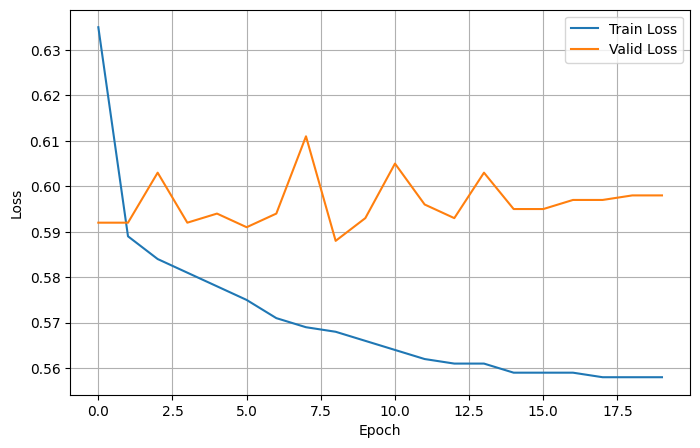

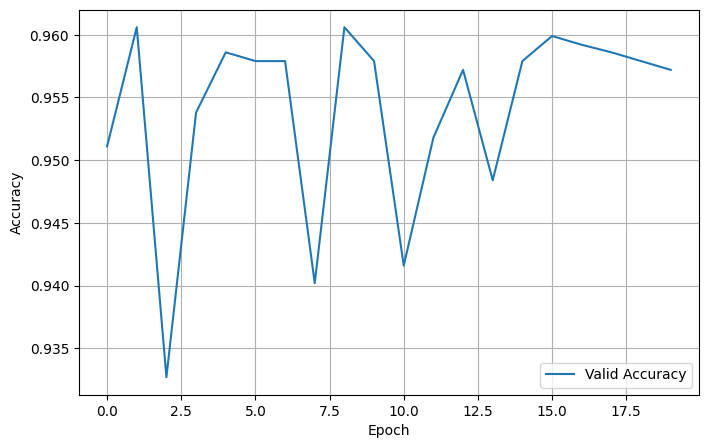

Final Validation Accuracy: 95.72%
Test Accuracy: 96.33%


In [20]:
import re
import matplotlib.pyplot as plt

def get_metrics(log_file):

    train_losses = []
    valid_losses = []
    valid_errors = []
    test_error = None


    epoch_pattern = re.compile(
        r"train loss:\s*([\d.eE+-]+).*valid loss:\s*([\d.eE+-]+),\s*valid error:\s*([\d.eE+-]+)"
    )

    test_pattern = re.compile(r"test error:\s*([\d.eE+-]+)")

    with open(log_file, 'r') as f:
        for line in f:
            m = epoch_pattern.search(line)
            if m:
                train_losses.append(float(m.group(1)))
                valid_losses.append(float(m.group(2)))
                valid_errors.append(float(m.group(3)))
            t = test_pattern.search(line)
            if t:
                test_error = float(t.group(1))

    return train_losses, valid_losses, valid_errors, test_error

log_file = '/content/drive/MyDrive/conv_project/CONV_AI_DATA/results/Whisper_ECAPA-TDNN/1986/train_log.txt'
train_losses, valid_losses, valid_errors, test_error = get_metrics(log_file)


plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


valid_accuracies = [1.0 - err for err in valid_errors]
plt.figure(figsize=(8, 5))
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


if valid_accuracies:
    print(f"Final Validation Accuracy: {valid_accuracies[-1]*100:.2f}%")
else:
    print("No validation error entries found in log.")

if test_error is not None:
    test_accuracy = 1.0 - test_error
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")
else:
    print("No test error entry found in log.")


###**Speaker Separation for ECAPA_TDNN**

In [60]:
import os
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
from mir_eval.separation import bss_eval_sources
from speechbrain.pretrained import SepformerSeparation
import numpy as np


HPARAMS_FILE = "hparams_ecapa.yaml"
with open(HPARAMS_FILE) as fin:
    hparams = load_hyperpyyaml(fin)

from train_TDNN import ECAPA_Brain, dataio_prep
_ = dataio_prep(hparams)

run_opts = {"device": "cuda" if torch.cuda.is_available() else "cpu"}
ecapa_brain = ECAPA_Brain(
    modules=hparams["modules"],
    hparams=hparams,
    run_opts=run_opts,
    checkpointer=hparams["checkpointer"],
)
ecapa_brain.checkpointer.recover_if_possible()


def predict_speaker_count(wav: torch.Tensor) -> int:
    wav = wav.to(ecapa_brain.device)
    lengths = torch.tensor([wav.size(1)], device=ecapa_brain.device)
    ecapa_brain.modules.compute_features.eval()
    ecapa_brain.modules.mean_var_norm.eval()
    ecapa_brain.modules.embedding_model.eval()
    ecapa_brain.modules.classifier.eval()
    with torch.no_grad():
        feats = ecapa_brain.modules.compute_features(wav)
        feats = ecapa_brain.modules.mean_var_norm(feats, lengths)
        embeddings = ecapa_brain.modules.embedding_model(feats, lengths)
        outputs = ecapa_brain.modules.classifier(embeddings)
        if outputs.dim() == 3 and outputs.size(1) == 1:
            outputs = outputs.squeeze(1)
        if outputs.dim() == 3:
            outputs = outputs.mean(dim=1)
        return int(outputs.argmax(dim=-1).item())

SEP_MODELS = {
    1: None,
    2: "speechbrain/sepformer-wsj02mix",
    3: "speechbrain/sepformer-libri3mix",
}
_sep_cache = {}

def get_separation_model(n_spk: int):
    if n_spk <= 1:
        return None
    repo = SEP_MODELS.get(n_spk, SEP_MODELS[3])
    if repo not in _sep_cache:
        _sep_cache[repo] = SepformerSeparation.from_hparams(
            source=repo,
            savedir=os.path.join("tmp_sep", repo.replace("/", "_"))
        )
    return _sep_cache[repo]


def separate_and_evaluate(mix_path, ref_paths):
    wav, fs = torchaudio.load(mix_path)
    count = predict_speaker_count(wav)
    print(f"{os.path.basename(mix_path)} : predicted {count} speaker(s)")

    if count <= 1:
        est_sources = wav.squeeze(0).cpu().numpy()[None, :]
    else:
        sep_model = get_separation_model(count)
        est = sep_model.separate_batch(wav.to(sep_model.device))
        est_sources = est.squeeze(0).cpu().numpy()

    ref_list = [torchaudio.load(p)[0].squeeze(0).numpy() for p in ref_paths]
    refs = np.stack(ref_list[: est_sources.shape[0]], axis=0)


    if est_sources.shape != refs.shape:
        est_sources = est_sources.T

    sdr, sir, sar, _ = bss_eval_sources(refs, est_sources)
    base = os.path.splitext(os.path.basename(mix_path))[0]
    for i, src in enumerate(est_sources, 1):
        torchaudio.save(f"{base}_sep{i}.wav", torch.from_numpy(src).unsqueeze(0), fs)
    print(f"  SDR: {sdr}, SIR: {sir}, SAR: {sar}")
    return sdr, sir, sar


if __name__ == "__main__":
    TEST_SET = [
        ("./splits/test/Mixture_audio/mix1_audio/mix1_103.wav",
         ["./splits/test/Sources/spk1/mix1_103_spk1.wav"]),
        ("./splits/test/Mixture_audio/mix2_audio/mix2_121.wav",
         ["./splits/test/Sources/spk1/mix2_121_spk1.wav",
          "./splits/test/Sources/spk2/mix2_121_spk2.wav"]),
        ("./splits/test/Mixture_audio/mix3_audio/mix3_984.wav",
         ["./splits/test/Sources/spk1/mix3_984_spk1.wav",
          "./splits/test/Sources/spk2/mix3_984_spk2.wav",
          "./splits/test/Sources/spk3/mix3_984_spk3.wav"])
    ]

    all_sdr = []
    for mix, refs in TEST_SET:
        met = separate_and_evaluate(mix, refs)
        if met:
            sdr, sir, sar = met
            all_sdr.append(sdr.mean())
    if all_sdr:
        print("Average SDR:", sum(all_sdr)/len(all_sdr))


DEBUG:speechbrain.dataio.encoder:Loaded categorical encoding from results/ECAPA-TDNN/1986/save/label_encoder.txt
INFO:speechbrain.dataio.encoder:Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
DEBUG:speechbrain.dataio.encoder:Loaded categorical encoding from results/ECAPA-TDNN/1986/save/label_encoder.txt
INFO:speechbrain.core:Gradscaler enabled: `False`
INFO:speechbrain.core:Using training precision: `--precision=fp32`
INFO:speechbrain.core:Using evaluation precision: `--eval_precision=fp32`
INFO:speechbrain.core:ECAPA_Brain Model Statistics:
* Total Number of Trainable Parameters: 6.2M
* Total Number of Parameters: 6.2M
* Trainable Parameters represent 100.0000% of the total size.
INFO:speechbrain.utils.checkpoints:Loading a checkpoint from results/ECAPA-TDNN/1986/save/CKPT+2025-04-24+23-47-11+00
<ipython-input-60-3fa68a3458d4>:88: FutureWarning: mir_eval.separation.bss_eval_sources


mix1_103.wav : predicted 1 speaker(s)
  SDR: [285.65841341], SIR: [inf], SAR: [285.65841341]
mix2_121.wav : predicted 2 speaker(s)


DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmp_sep/speechbrain_sepformer-wsj02mix.
INFO:speechbrain.utils.fetching:Fetch masknet.ckpt: Using symlink found at '/content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA/tmp_sep/speechbrain_sepformer-wsj02mix/masknet.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["masknet"] = /content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA/tmp_sep/speechbrain_sepformer-wsj02mix/masknet.ckpt
INFO:speechbrain.utils.fetching:Fetch encoder.ckpt: Using symlink found at '/content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA/tmp_sep/speechbrain_sepformer-wsj02mix/encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["encoder"] = /content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA/tmp_sep/speechbrain_sepformer-wsj02mix/enco

  SDR: [3.42061777 0.07771351], SIR: [4.05542739 0.48663297], SAR: [13.52525886 13.31583028]
mix3_984.wav : predicted 3 speaker(s)


DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in tmp_sep/speechbrain_sepformer-libri3mix.
INFO:speechbrain.utils.fetching:Fetch encoder.ckpt: Using symlink found at '/content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA/tmp_sep/speechbrain_sepformer-libri3mix/encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["encoder"] = /content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA/tmp_sep/speechbrain_sepformer-libri3mix/encoder.ckpt
INFO:speechbrain.utils.fetching:Fetch masknet.ckpt: Using symlink found at '/content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA/tmp_sep/speechbrain_sepformer-libri3mix/masknet.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["masknet"] = /content/drive/.shortcut-targets-by-id/12ept9CxhdsGsTvxr-YsdylQ9HTMnNMOm/CONV_AI_DATA/tmp_sep/speechbrain_sepformer-libri3mix

  SDR: [1.80697964 8.47942176 6.03057649], SIR: [11.99133033 15.75689521 10.89119819], SAR: [2.51078475 9.49332702 8.08752165]
Average SDR: 97.61552389213081


**Ogirignal Mix Speaker 3**


In [61]:
import torchaudio, IPython.display as ipd
wave, sr = torchaudio.load("./splits/test/Mixture_audio/mix3_audio/mix3_984.wav")
ipd.Audio(wave.numpy(), rate=sr)

**Separated Speaker 1**


In [62]:
import torchaudio, IPython.display as ipd
wave, sr = torchaudio.load("./mix3_984_sep1.wav")
ipd.Audio(wave.numpy(), rate=sr)

**Separated Speaker 2**

In [58]:
import torchaudio, IPython.display as ipd
wave, sr = torchaudio.load("./mix3_984_sep2.wav")
ipd.Audio(wave.numpy(), rate=sr)

**Separated Speaker 3**

In [59]:
import torchaudio, IPython.display as ipd
wave, sr = torchaudio.load("./mix3_984_sep3.wav")
ipd.Audio(wave.numpy(), rate=sr)

## **Experimental Results**


**Helper Functions**

In [20]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from hyperpyyaml import load_hyperpyyaml
from speechbrain.core import Stage

def evaluate_and_plot(
    brain_class,
    dataio_prep_fn,
    hparams_path: str,
    dataset_key: str = "test",
    label_list: list = None,
    label_names: list = None,
    device: str = None,
):


    with open(hparams_path) as fin:
        hparams = load_hyperpyyaml(fin)


    datasets = dataio_prep_fn(hparams)
    dataset = datasets[dataset_key]


    brain = brain_class(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts={},
        checkpointer=hparams["checkpointer"],
    )
    brain.checkpointer.recover_if_possible()


    for module in brain.modules.values():
        module.eval()


    loader = brain.make_dataloader(
        dataset,
        **hparams["dataloader_options"],
        stage=Stage.TEST if dataset_key=="test" else Stage.VALID,
    )

    all_preds, all_targets = [], []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            logits = brain.compute_forward(batch, Stage.TEST)
            preds  = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().tolist())
            all_targets.extend(batch.n_src.cpu().tolist())


    labels = label_list or sorted(set(all_targets))
    disp = ConfusionMatrixDisplay.from_predictions(
        all_targets,
        all_preds,
        labels=labels,
        display_labels=label_names or labels,
        cmap=plt.cm.Blues,
        normalize=None,
    )
    plt.title(f"{brain_class.__name__} – {dataset_key.capitalize()} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print(classification_report(
        all_targets,
        all_preds,
        labels=labels,
        target_names=label_names or [str(l) for l in labels],
    ))


###**X_Vector**

DEBUG:speechbrain.dataio.encoder:Loaded categorical encoding from ./results/MFCCs/1986/save/label_encoder.txt
INFO:speechbrain.dataio.encoder:Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
DEBUG:speechbrain.dataio.encoder:Loaded categorical encoding from ./results/MFCCs/1986/save/label_encoder.txt
INFO:speechbrain.core:Gradscaler enabled: `False`
INFO:speechbrain.core:Using training precision: `--precision=fp32`
INFO:speechbrain.core:Using evaluation precision: `--eval_precision=fp32`
INFO:speechbrain.core:XVector_Brain Model Statistics:
* Total Number of Trainable Parameters: 94.9k
* Total Number of Parameters: 94.9k
* Trainable Parameters represent 100.0000% of the total size.
INFO:speechbrain.utils.checkpoints:Loading a checkpoint from results/MFCCs/1986/save/CKPT+2025-04-24+21-33-07+00


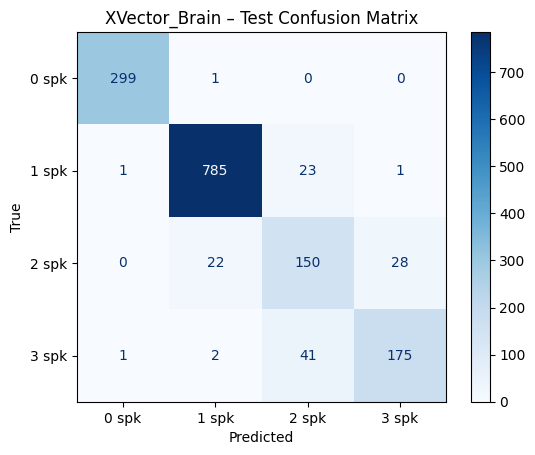

              precision    recall  f1-score   support

       0 spk       0.99      1.00      1.00       300
       1 spk       0.97      0.97      0.97       810
       2 spk       0.70      0.75      0.72       200
       3 spk       0.86      0.80      0.83       219

    accuracy                           0.92      1529
   macro avg       0.88      0.88      0.88      1529
weighted avg       0.92      0.92      0.92      1529



In [21]:
from train import XVector_Brain, dataio_prep

evaluate_and_plot(
    brain_class   = XVector_Brain,
    dataio_prep_fn= dataio_prep,
    hparams_path  = "hparams_xvector_mfccs.yaml",
    dataset_key   = "test",
    label_list    = [0,1,2,3],
    label_names   = ["0 spk","1 spk","2 spk","3 spk"],
)


###**ECAPA_TDNN**

DEBUG:speechbrain.dataio.encoder:Loaded categorical encoding from results/ECAPA-TDNN/1986/save/label_encoder.txt
INFO:speechbrain.dataio.encoder:Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
DEBUG:speechbrain.dataio.encoder:Loaded categorical encoding from results/ECAPA-TDNN/1986/save/label_encoder.txt
INFO:speechbrain.core:Gradscaler enabled: `False`
INFO:speechbrain.core:Using training precision: `--precision=fp32`
INFO:speechbrain.core:Using evaluation precision: `--eval_precision=fp32`
INFO:speechbrain.core:ECAPA_Brain Model Statistics:
* Total Number of Trainable Parameters: 6.2M
* Total Number of Parameters: 6.2M
* Trainable Parameters represent 100.0000% of the total size.
INFO:speechbrain.utils.checkpoints:Loading a checkpoint from results/ECAPA-TDNN/1986/save/CKPT+2025-04-24+23-47-11+00


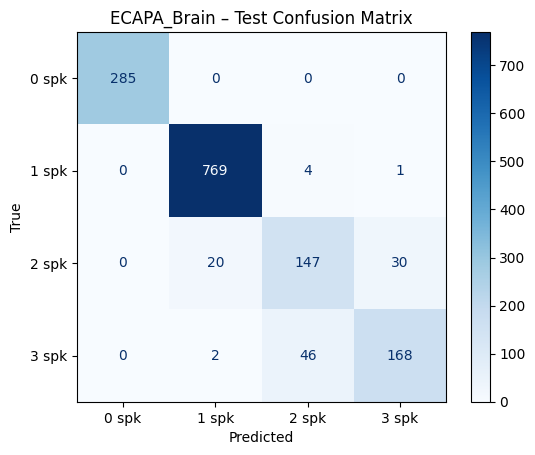

              precision    recall  f1-score   support

       0 spk       1.00      1.00      1.00       285
       1 spk       0.97      0.99      0.98       774
       2 spk       0.75      0.75      0.75       197
       3 spk       0.84      0.78      0.81       216

    accuracy                           0.93      1472
   macro avg       0.89      0.88      0.88      1472
weighted avg       0.93      0.93      0.93      1472



In [22]:
from train_TDNN import ECAPA_Brain, dataio_prep

evaluate_and_plot(
    brain_class   = ECAPA_Brain,
    dataio_prep_fn= dataio_prep,
    hparams_path  = "hparams_ecapa.yaml",
    dataset_key   = "test",
    label_list    = [0,1,2,3],
    label_names   = ["0 spk","1 spk","2 spk","3 spk"],
)

###**Whisper_ECAPA_TDNN**

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
DEBUG:speechbrain.dataio.encoder:Loaded categorical encoding from results/Whisper_ECAPA-TDNN/1986/save/label_encoder.txt
INFO:speechbrain.dataio.encoder:Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
DEBUG:speechbrain.dataio.encoder:Loaded categorical encoding from results/Whisper_ECAPA-TDNN/1986/save/label_encoder.txt
INFO:speechbrain.core:Gradscaler enabled: `False`
INFO:sp

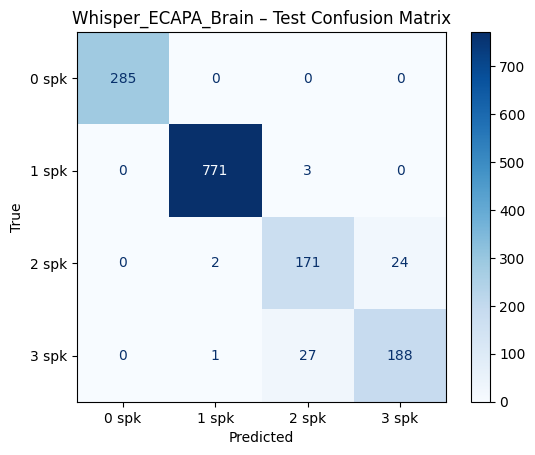

              precision    recall  f1-score   support

       0 spk       1.00      1.00      1.00       285
       1 spk       1.00      1.00      1.00       774
       2 spk       0.85      0.87      0.86       197
       3 spk       0.89      0.87      0.88       216

    accuracy                           0.96      1472
   macro avg       0.93      0.93      0.93      1472
weighted avg       0.96      0.96      0.96      1472



In [32]:
from train_Whisper_TDNN import Whisper_ECAPA_Brain, dataio_prep

evaluate_and_plot(
    brain_class   = Whisper_ECAPA_Brain,
    dataio_prep_fn= dataio_prep,
    hparams_path  = "hparams__Whisper_ecapa.yaml",
    dataset_key   = "test",
    label_list    = [0,1,2,3],
    label_names   = ["0 spk","1 spk","2 spk","3 spk"],
)

###**Conclusions**



#####**Clip-level accuracy**

* X_VECTOR:
  - Test Accuracy: 91.76%
  - Validation Accuracy: 92.60%
  - Remark: Validation loss sticks above 0.18 after epoch 5.
* ECAPA_TDNN:
  - Test Accuracy:93.41%
  - Validation Accuracy: 94.23%
  - remark: Overall +1.60 accuracy bump.
* WHISPER_ECAPA_TDNN
  - Test Accuracy: 96.33%
  - Validation Accuracy: 	95.72%
  - remark: Best generalisation

#####**Confusion-matrix heat map**

* Silence (0 spk):
  - All three models perform best here.
* Single-speaker detection (1 spk)
  - XVector_Brain: 96.9%
  - ECAPA_Brain: 99.4%
  - Whisper + ECAPA : 99.6%
* Two Speaker counts (2 spk)
  - XVector_Brain: 75.0%
  - ECAPA_Brain: 74.6%
  - Whisper + ECAPA : 86.8%
* Three Speaker counts (3 spk)
  - XVector_Brain: 79.9%
  - ECAPA_Brain: 77.8%
  - Whisper + ECAPA : 87.0%


**REMARK:**
The Stronges Whisper + ECAPA model misses ~13% of 2-speaker and 3-speaker clips

#####**SDR (Signal-to-distortion ratio)**

Measures all unwanted stuff (interference + noise + artifacts) relative to the true speech. Higher = cleaner.

* Two Speaker Separation:
  - 1.8 dB
  - Very modest improvement over the mixed input.
* Threee speaker separation:
  - 5.4 dB
  - better than the 2-speaker case.

#####**SIR (Signal-to-inference ratio)**




Measures just the other voices (other people talking) versus your targeted voice.

* Two Speaker Separation:
  - 2.3 dB
  - Suppressed the other speaker only slightly better than noise.
* Threee speaker separation:
  - 12.9 dB
  - Good suppression of the other two speakers.

#####**SIR (Signal-to-Artifact ratio)**



Measures the artifacts introduced by your separation algorithm

* Two Speaker Separation:
  - 13.4 dB
  - Fairly low artifact distortion.
* Threee speaker separation:
  -  6.7 dB
  - Small algorithmic artifact

####**Future work**

1. ***On the fly noise-injection or speed/volume pertubation to help the classifier generalize better.***
2. ***More complex classifier head rather than simple linear one.***
3. ***Consider using [openai/whisper-base](https://huggingface.co/openai/whisper-base) rather than the tiny version used here***.
4. ***Experiment with Self-supervised model [wavLm](https://speechbrain.readthedocs.io/en/develop/API/speechbrain.lobes.models.huggingface_transformers.wavlm.html) specifically desined for speaker tasks.***

## **References**
1. [Attention is All You Need in Speech Separation](https://arxiv.org/abs/2010.13154)
2. [LibriMix: An Open-Source Dataset for Generalizable Speech Separation](https://arxiv.org/abs/2005.11262)
3. [TakhirMirzaev. (2020). tmirzaev-dotcom/ConvTasNet_Libri3Mix_sepnoisy](https://doi.org/10.5281/zenodo.4020529)
4. [NTT Multi-Speaker ASR System for the DASR Task of CHiME-8 Challenge](https://arxiv.org/html/2409.05554v1)
5. [Overlapped Speech Detection and speaker counting using distant microphone arrays](https://www.sciencedirect.com/science/article/abs/pii/S0885230821001054)
6. [CountNet: Estimating the Number of Concurrent Speakers Using Supervised Learning](https://ieeexplore.ieee.org/document/8506601)
7. [What automatic speech recognition can and cannot do for conversational speech transcription](https://www.sciencedirect.com/science/article/pii/S2772766124000697)
8. [Amazon’s new AI-powered Alexa promises to be your ‘best friend in a digital world’ for a monthly fee](https://apnews.com/article/amazon-alexa-fee-ai-assistant-017c17bddfa6742d1e78873cdda3663f)